<a href="https://colab.research.google.com/github/paul3183/Pyspark_BigData_Udemy/blob/main/04_SECCI%C3%93N06_Aspectos_Avanzados_RDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ALMACENAMIENTO EN CACHÉ:

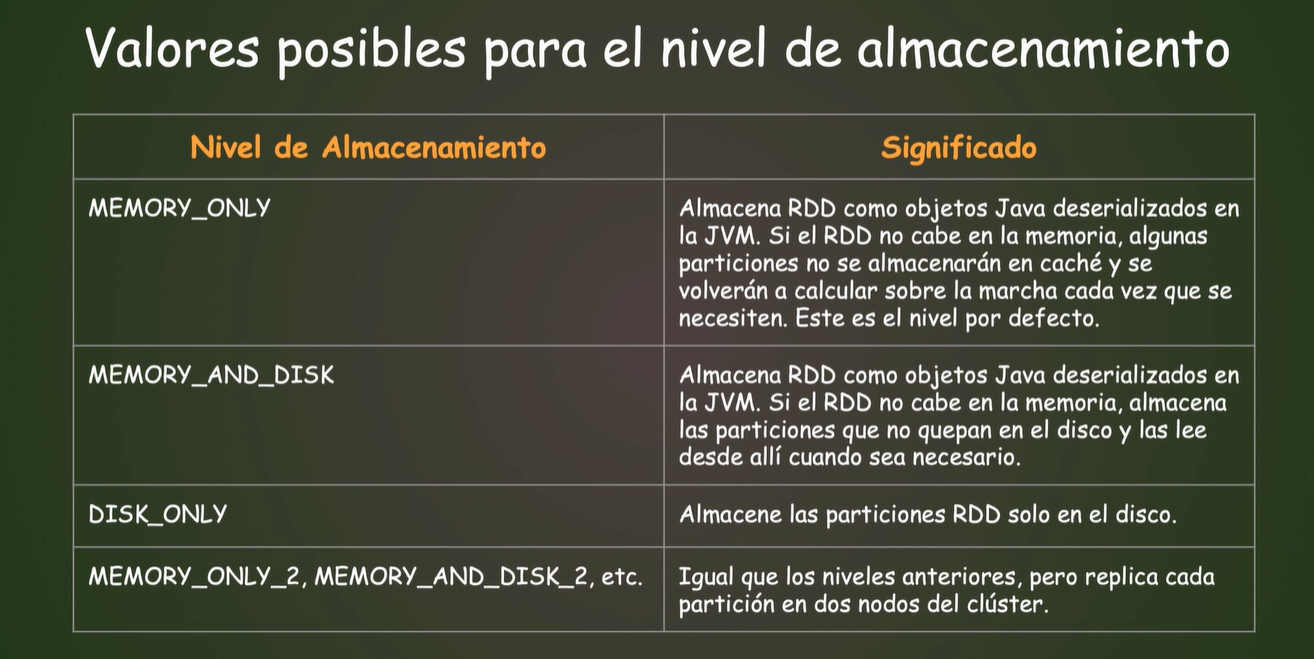

In [ ]:
#cache() es sinónimo de persist(MEMORY_ONLY)

In [ ]:
#INSTALAMOS:

In [1]:
# Instalar SDK Java 8

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Descargar Spark 3.4.3

!wget -q https://archive.apache.org/dist/spark/spark-3.4.3/spark-3.4.3-bin-hadoop3.tgz

# Descomprimir el archivo descargado de Spark

!tar xf spark-3.4.3-bin-hadoop3.tgz

# Establecer las variables de entorno

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.3-bin-hadoop3"

# Instalar la librería findspark

!pip install -q findspark

# Instalar pyspark

!pip install -q pyspark

# verificar la instalación ###

import findspark

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
sc = spark.sparkContext

In [3]:
rdd = sc.parallelize([item for item in range(10)])

In [4]:
from pyspark.storagelevel import StorageLevel

In [5]:
rdd.persist(StorageLevel.MEMORY_ONLY)

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:287

In [6]:
rdd.unpersist()

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:287

In [7]:
rdd.persist(StorageLevel.DISK_ONLY)

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:287

In [8]:
rdd.unpersist()

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:287

In [9]:
rdd.cache()

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:287

In [10]:
#Particionado y mezcla de datos "SHUFFLING":
#Paticionadores de Spark:
#1.-HashPartitioner hash(item) % num_particiones)
#2.-RangePartitioner (divide el RDD en rangos aproximadente iguales)

In [11]:
#HashPartitioner:
rdd_02 = sc.parallelize(['x', 'y', 'z'])

In [12]:
hola = 'Hola'

In [13]:
hash(hola)

3491872081692247143

In [14]:
num_particiones = 6

In [15]:
#indice = hash(item) % num_particiones

In [16]:
#indice del valor x, iría a la partición 5
hash('x') % num_particiones

3

In [19]:
#indice del valor y, iría a la partición 3
hash('y') % num_particiones

1

In [20]:
#indice del valor z, iría a la partición 1
hash('z') % num_particiones

0

##MEZCLA DE DATOS (SHUFFLING)

In [21]:
#Broadcast variables:
rdd_03 = sc.parallelize(item for item in range(10))

In [22]:
uno = 1

In [23]:
#las variables broadcast ocupan memoria en todos los ejecutores
br_uno = sc.broadcast(uno)

In [24]:
rdd10 = rdd_03.map(lambda x: x + br_uno.value)

In [25]:
rdd10.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [26]:
#retiramos de todos los ejecutores la variable broadcast
#elimina los datos de todos los ejecutores para optimizar recursos.
br_uno.unpersist()

In [27]:
#si volvieramos a crear y la llamamos a la variable broadcast
#se ejecuta sin problemas, pues no la elimina, solo se liberó
#y luego fue llamada nuevamente.
rdd10 = rdd_03.map(lambda x: x + br_uno.value)

In [28]:
rdd10.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [29]:
#Eliminando variables Broadcast:
#de todos los ejecutores, la funcion destroy, esta destruye todos
#los datos y metadatos relacionados con la variable

In [30]:
br_uno.destroy()

In [31]:
rdd10 = rdd_03.map(lambda x: x + br_uno.value)

In [32]:
#rdd10.take(5)
#Al ejecutar la linea de arriba take,
#Nos da un error por; Caused by: org.apache.spark.SparkException:
#Attempted to use Broadcast(7) after it was destroyed (destroy at NativeMethodAccessorImpl.java:0)

#ACUMULADORES

In [33]:
acumulador = sc.accumulator(0)

In [34]:
rdd11 = sc.parallelize([2,4,6,8,10])

In [35]:
rdd11.foreach(lambda x: acumulador.add(x))

In [36]:
print(acumulador.value)

30


In [37]:
rdd12 = sc.parallelize('Mi nombre es Paul Ruiz y me siento estupendo'.split(' '))

In [38]:
acumulador1 = sc.accumulator(0)

In [39]:
rdd12.foreach(lambda x: acumulador1.add(1))

In [40]:
print(acumulador1.value)

9


#EJERCICIOS:

In [42]:
#Los datos adjuntos como recurso a esta lección contienen los importes de ventas en un día en un supermercado.

In [53]:
#1.-Cree un RDD importes a partir de los datos adjuntos a esta lección como recurso. Emplee acumuladores para obtener
#el total de ventas realizadas y el importe total de las ventas.
importes = sc.textFile('./data03/')

In [54]:
importes.take(5)

['527', '386', '701', '240', '941']

In [55]:
total_ventas = sc.accumulator(0)
importe_total = sc.accumulator(0)

In [56]:
importes.foreach(lambda x: total_ventas.add(1))
importes.foreach(lambda x: importe_total.add(float(x)))

In [57]:
total_ventas.value

10000

In [58]:
importe_total.value

5042335.0

In [59]:
#comprobamos
importes.count()

10000

In [44]:
#2.-Si se conoce que a cada venta hay que restarle un importe fijo igual a 10 pesos por temas de impuestos.

In [63]:
#a.- ¿Cómo restaría este impuesto de cada venta utilizando una variable broadcast para acelerar el proceso?
impuesto_a_restar = sc.broadcast(10)

In [64]:
#b.- Cree un RDD llamado ventas_sin_impuestos a partir de la propuesta del inciso a que contenga las ventas sin impuestos.
ventas_sin_impuestos = importes.map(lambda x: float(x) - impuesto_a_restar.value)

In [66]:
ventas_sin_impuestos.take(5)

[517.0, 376.0, 691.0, 230.0, 931.0]

In [67]:
#c.- Destruya la variable broadcast creada luego de emplearla para crear el RDD del inciso b.
impuesto_a_restar.destroy()


In [69]:
#3.- Persista el RDD ventas_sin_impuestos en los siguientes niveles de persistencia.
from pyspark.storagelevel import StorageLevel

In [68]:
#a.- Memoria.
ventas_sin_impuestos.cache()

PythonRDD[17] at RDD at PythonRDD.scala:53

In [70]:
#b.- Disco solamente
ventas_sin_impuestos.unpersist()

PythonRDD[17] at RDD at PythonRDD.scala:53

In [71]:
ventas_sin_impuestos.persist(StorageLevel.DISK_ONLY)

PythonRDD[17] at RDD at PythonRDD.scala:53

In [51]:
#c. Memoria y disco.

In [72]:
ventas_sin_impuestos.unpersist()

PythonRDD[17] at RDD at PythonRDD.scala:53

In [73]:
ventas_sin_impuestos.persist(StorageLevel.MEMORY_AND_DISK)

PythonRDD[17] at RDD at PythonRDD.scala:53